Тайцзицюань:  1
Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                        


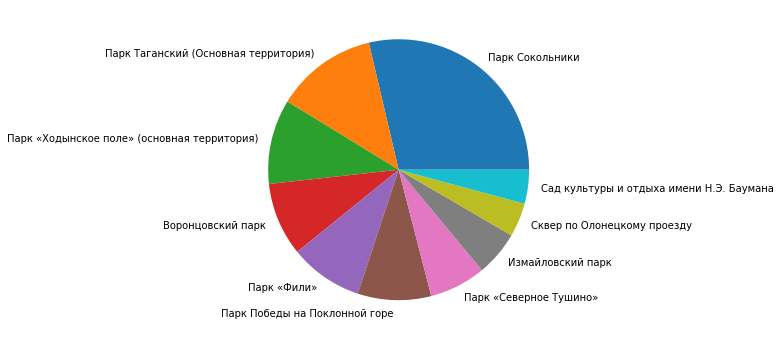

In [4]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import binascii
import pdfkit

r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns=["CourseName", "CoursesTimetable", "NameOfPark"])
data["NameOfPark"] = data["NameOfPark"].apply(lambda x: x["value"])
data.columns = ["Активность", "Расписание", "Парк"]
print ("Тайцзицюань: ",
       data[data["Активность"].str.contains("Тайцзицюань")]["Активность"].count())
fig = plt.figure(figsize=(12,6))
area = fig.add_subplot(1,1,1)
parks = data.groupby("Парк").count().sort_values("Активность", ascending=False)
parks.head(10)["Активность"].plot.pie(ax=area, label="")
img = BytesIO()
plt.savefig(img)
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(),
                                    newline=False).decode("UTF-8")
pd.set_option('display.max_colwidth', 1000)
html = '''<html>
<head>
    <title>Активности в парках Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Активности в парках Москвы</h1>
    <img src="''' + img + '''" alt="Популярные парки"/>
    ''' + data.to_html(index=False) + '''
</body>
</html>'''
config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'parks.pdf',
                   configuration=config, options=options)
with open("parks.html", "w", encoding="utf-8") as file:
    file.write(html)